# This notebook contains some more complex test cases (e.g. with cycles) 


In [3]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

%autoreload 2
import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph
from rwtools.nemesis.graph.utils import equalize_path_lengths

def to_png(graph, name="temp"):
    out_file = os.path.abspath(f"./{name}.dot")
    nx.drawing.nx_agraph.write_dot(graph, out_file)
    cmd = f"dot -Tpng {out_file} -o {name}.png"
    os.system(cmd)
    img = mpimg.imread(f"{name}.png")
    plt.figure(figsize = (10,10))
    plt.imshow(img)


    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/notebooks


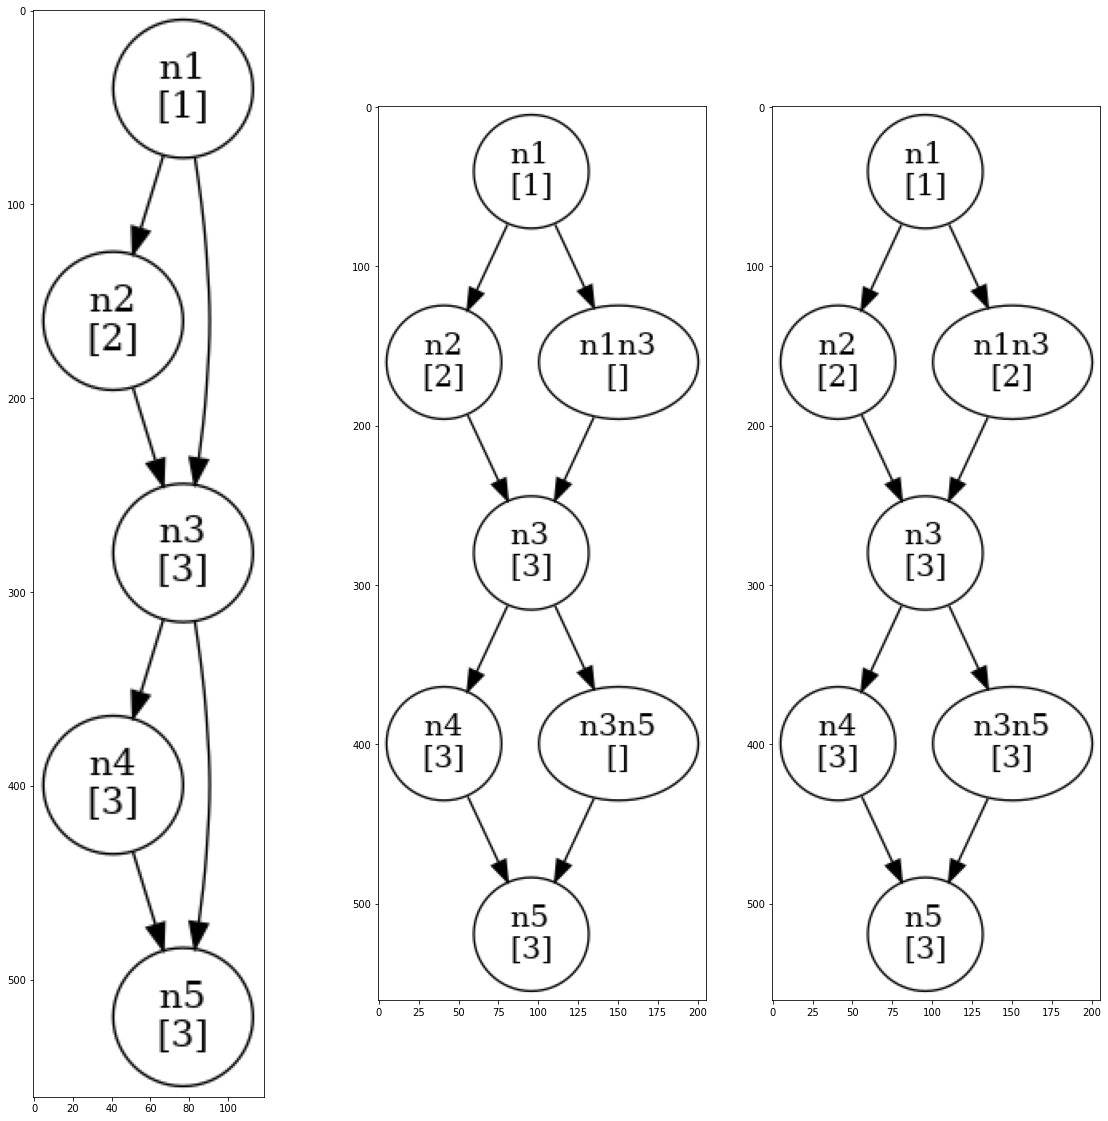

In [10]:
from rwtools.nemesis.graph.utils import insert_nodes, to_img
from rwtools.nemesis.graph.balance import balance_branching_point
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([3], "n4")
n5 = AbstractNemesisNode([3], "n5")


g_nodes = [n1, n2, n3, n4, n5]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)
G.add_node(n5)

G.add_edge(n1, n2)
G.add_edge(n1, n3) 
G.add_edge(n2, n3)

G.add_edge(n3, n4)
G.add_edge(n3, n5)
G.add_edge(n4, n5)

# G.add_edge(n1, n5)

fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].imshow(to_img(G))
insert_nodes(G)
axs[1].imshow(to_img(G))
balance_branching_point(G, n1)
axs[2].imshow(to_img(G))

AssertionError: 

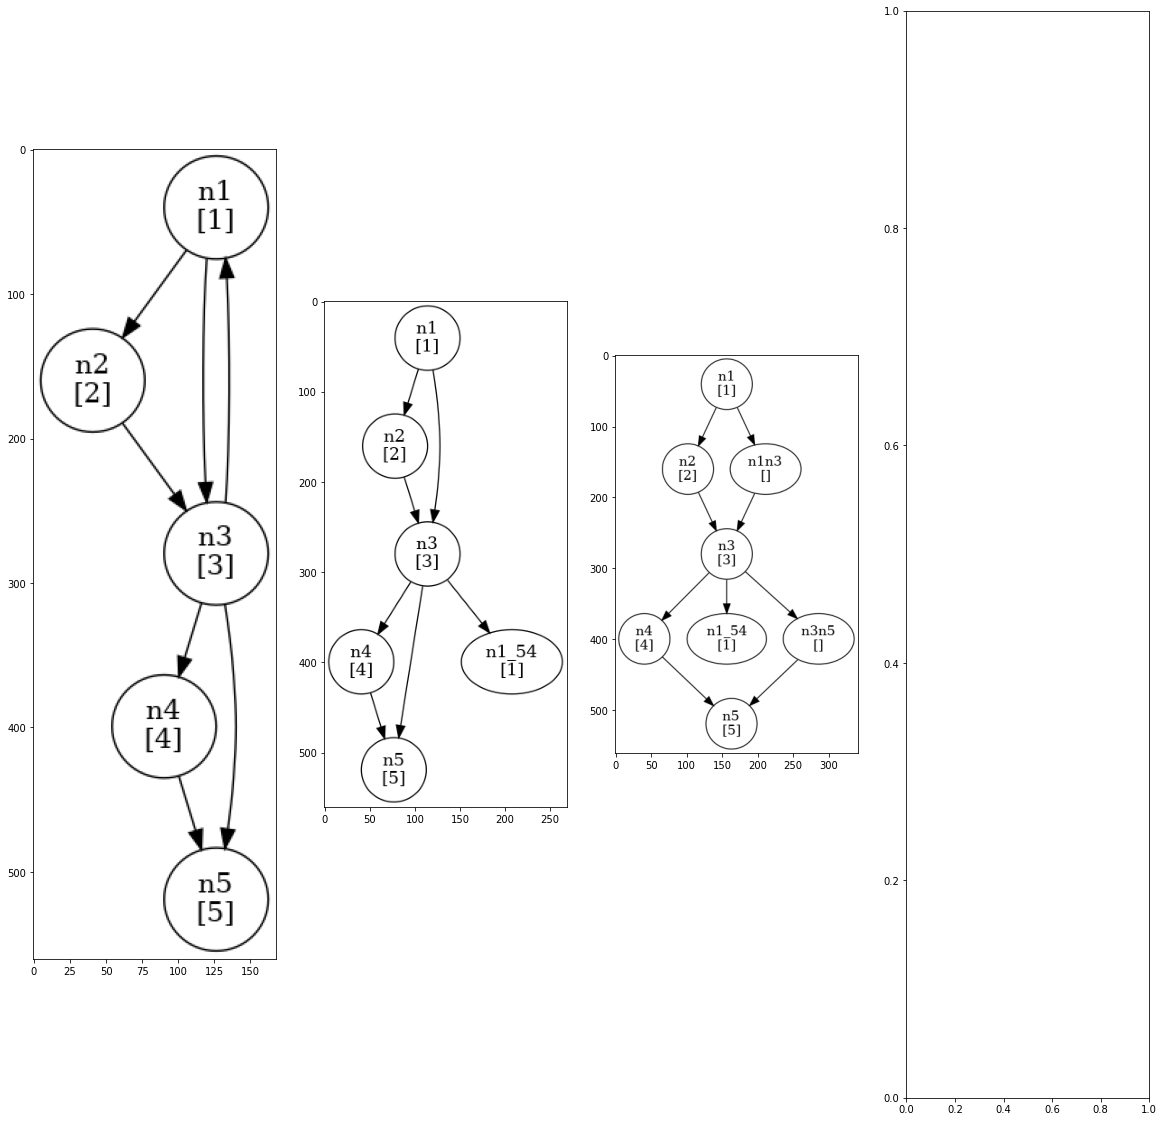

In [23]:
from rwtools.nemesis.graph.utils import unwind_graph
G = nx.DiGraph()
n1 = AbstractNemesisNode([1], "n1")
n2 = AbstractNemesisNode([2], "n2")
n3 = AbstractNemesisNode([3], "n3")

n4 = AbstractNemesisNode([4], "n4")
n5 = AbstractNemesisNode([5], "n5")


g_nodes = [n1, n2, n3, n4, n5]

G.add_node(n1)
G.add_node(n2)
G.add_node(n3)
G.add_node(n4)
G.add_node(n5)

G.add_edge(n1, n2)
G.add_edge(n1, n3) 
G.add_edge(n2, n3)

G.add_edge(n3, n4)
G.add_edge(n3, n5)
G.add_edge(n4, n5)
G.add_edge(n3, n1)

# G.add_edge(n1, n5)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(to_img(G))
unwind_graph(G, n1)
axs[1].imshow(to_img(G))
insert_nodes(G)
axs[2].imshow(to_img(G))
balance_branching_point(G, n1)
axs[3].imshow(to_img(G))